In [1]:
# Use if requirements not installed!!!
# !pip install pillow
# !pip install opencv-python

In [2]:
import colorsys;
from PIL import Image
import numpy as np
from numpy import *
import cv2
import math
import pylab
from pylab import imread, imshow
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [3]:
#Change this to desired file name!
file_name = 'minmona.jpg'

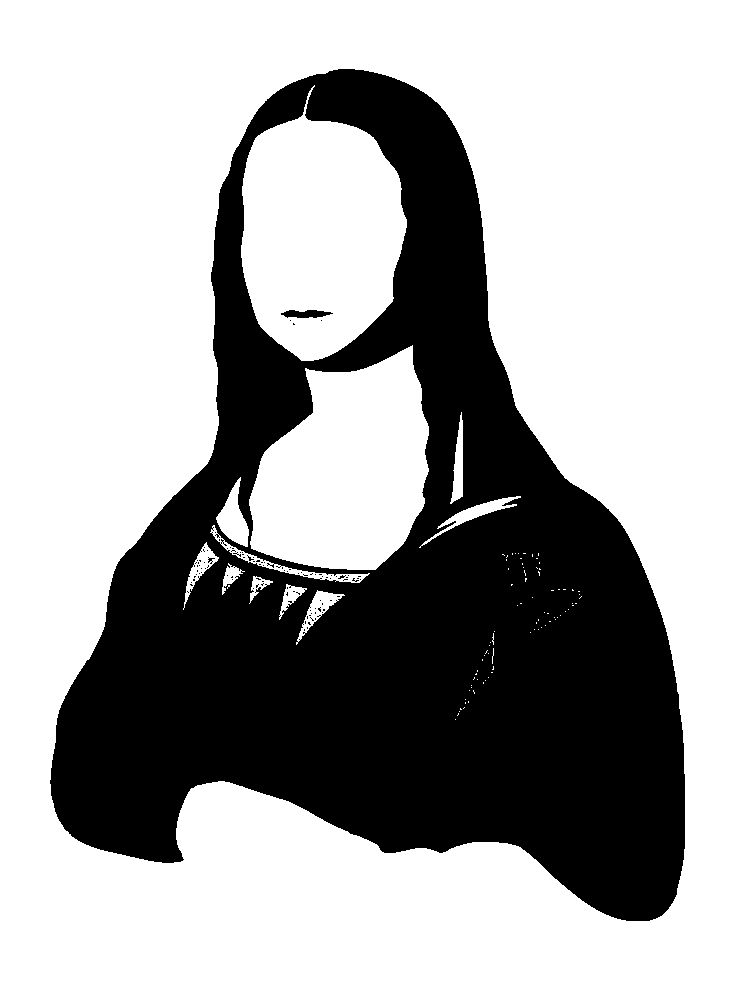

In [4]:
imgOrg = Image.open(file_name).convert('RGB')
im1 = imread(file_name)

#takes in a picture expected to be RGB not RGBA and a threshold for setting pixel to black or white
def high_contrast(picture, thres):
    pic = picture.copy()
    pixels = pic.load() # create the pixel map
    print(pixels);
    max = 0
    for i in range(pic.size[0]): # for every pixel:
        for j in range(pic.size[1]):
            #print(pixels[i,j])
            r,g,b = pixels[i,j];
            average = int((r + b + g) / 3)
            if max < average:
                max = average;
            pixels[i,j] = (average, average, average)
            #print(str(r) + " " + str(g) + " " + str(b))
    #pic.show()
    for i in range(pic.size[0]): # for every pixel:
        for j in range(pic.size[1]):
            #print(pixels[i,j])
            r,g,b = pixels[i,j];
            scaled = int(255 * r / max)
            if (scaled < thres) :
                scaled = 0
            else:
                scaled = 255
            pixels[i,j] = (scaled, scaled, scaled)
    return pic

high_contrast(imgOrg, 100)


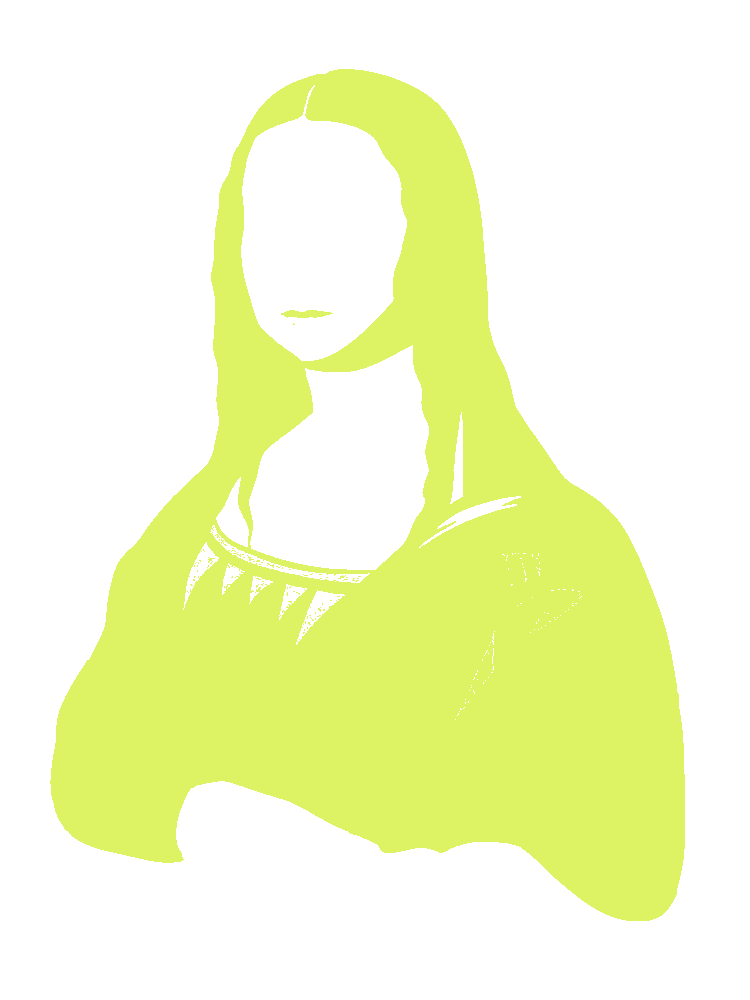

In [5]:
def blank(picture):
    pic = picture.copy();
    pixels = pic.load()
    for i in range(pic.size[0]): # for every pixel:
        for j in range(pic.size[1]):
            #print(pixels[i,j])
            pixels[i,j] = (255, 255, 255)
    return pic

def infill_color(picture, color):
    pic_b = high_contrast(imgOrg, 100)
    pic_empty = blank(picture)

    highConPixels = pic_b.load()
    outPixels = pic_empty.load()
    fill = []
    if color == "red":
        fill = [254, 0, 0]
    elif color == "green":
        fill = [0, 254, 0]
    elif color == "blue":
        fill = [0, 0, 254]
    elif color == "black":
        fill = [0, 0, 0]
    else:
        fill = [random.randint(0, 254), random.randint(0, 254), random.randint(0, 254)]
    
    for i in range(picture.size[0]): # for every pixel in :
        for j in range(picture.size[1]):
            #print(pixels[i,j])
            if highConPixels[i,j] == (0,0,0):
                if (i == 0):
                    if (j == 0):
                        if highConPixels[i+1,j] == (0,0,0) or highConPixels[i+1,j+1] == (0,0,0) or highConPixels[i,j+1] == (0,0,0):
                            outPixels[i,j] = (255,255,255)
                    elif (j == picture.size[1] -1):
                        if highConPixels[i+1,j] == (0,0,0) or highConPixels[i+1,j-1] == (0,0,0) or highConPixels[i,j-1] == (0,0,0):
                            outPixels[i,j] = (0,255,255)
                    else:
                        if highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255) or highConPixels[i+1,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                elif (i == picture.size[0] -1):
                    if (j == 0):
                        if highConPixels[i-11,j] == (255,255,255) or highConPixels[i-11,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    elif (j == picture.size[1] -1):
                        if highConPixels[i-1,j] == (255,255,255) or highConPixels[i-1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255):
                            outPixels[i,j] = (0,55,55)
                    else:
                        if highConPixels[i-1,j] == (255,255,255) or highConPixels[i-1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255) or highConPixels[i-1,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,55,55)
                else:
                    if (j == 0):
                        if highConPixels[i-11,j] == (0,0,0) or highConPixels[i-11,j+1] == (0,0,0) or highConPixels[i,j+1] == (0,0,0) or highConPixels[i+1,j] == (0,0,0) or highConPixels[i+1,j+1] == (0,0,0):
                            outPixels[i,j] = (0,55,55)
                    elif (j == picture.size[1] -1):
                        if highConPixels[i-1,j] == (0,0,0) or highConPixels[i-1,j-1] == (0,0,0) or highConPixels[i,j-1] == (0,0,0) or highConPixels[i+1,j] == (0,0,0) or highConPixels[i+1,j-1] == (0,0,0):
                            outPixels[i,j] = (0,55,55)
                    else:
                        if highConPixels[i-1,j] == (0,0,0) or highConPixels[i-1,j-1] == (0,0,0) or highConPixels[i-1,j+1] == (0,0,0) or highConPixels[i,j+1] == (0,0,0) or highConPixels[i+1,j] == (0,0,0) or highConPixels[i+1,j-1] == (0,0,0) or highConPixels[i,j-1] == (0,0,0) or highConPixels[i+1,j+1] == (0,0,0):
                            outPixels[i,j] = (fill[0],fill[1],fill[2])
    return pic_empty
infill_color(imgOrg, "")

In [ ]:
def outline(pic, thres):
    highCon = high_contrast(pic, thres)
    out = blank(pic)

    highConPixels = highCon.load()
    outPixels = out.load()
    
    for i in range(pic.size[0]): # for every pixel:
        for j in range(pic.size[1]):
            #print(pixels[i,j])
            if highConPixels[i,j] == (0,0,0):
                if (i == 0):
                    if (j == 0):
                        if highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    elif (j == pic.size[1] -1):
                        if highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    else:
                        if highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255) or highConPixels[i+1,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                elif (i == pic.size[0] -1):
                    if (j == 0):
                        if highConPixels[i-11,j] == (255,255,255) or highConPixels[i-11,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    elif (j == pic.size[1] -1):
                        if highConPixels[i-1,j] == (255,255,255) or highConPixels[i-1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    else:
                        if highConPixels[i-1,j] == (255,255,255) or highConPixels[i-1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255) or highConPixels[i-1,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                else:
                    if (j == 0):
                        if highConPixels[i-11,j] == (255,255,255) or highConPixels[i-11,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255) or highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    elif (j == pic.size[1] -1):
                        if highConPixels[i-1,j] == (255,255,255) or highConPixels[i-1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255) or highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j-1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
                    else:
                        if highConPixels[i-1,j] == (255,255,255) or highConPixels[i-1,j-1] == (255,255,255) or highConPixels[i-1,j+1] == (255,255,255) or highConPixels[i,j+1] == (255,255,255) or highConPixels[i+1,j] == (255,255,255) or highConPixels[i+1,j-1] == (255,255,255) or highConPixels[i,j-1] == (255,255,255) or highConPixels[i+1,j+1] == (255,255,255):
                            outPixels[i,j] = (0,0,0)
    return out

outline(imgOrg, 100)
    

In [ ]:
def smooth(picture):

    cvHigh = np.array(picture)
    kernel = np.ones((5,5),np.float32)/25
    cvHigh = cv2.filter2D(cvHigh,-1,kernel)
    pic = Image.fromarray(cvHigh)
    return pic

def blurry(picture):
    pic = smooth(picture)
    for i in range(1000):
        pic = smooth(pic)
    #pic = picture.copy()
    '''
    pic = pic.resize((round(pic.size[0]/32), round(pic.size[1]/32)))
    pic = pic.resize(picture.size)
    '''
    
    
    
    return pic
blurry(imgOrg)


In [ ]:
def alot(im, x=0, y=0):
    for i in range(x):
        im = concatenate((im[:,0::2], im[:,1::2]), axis=1)
    for i in range(y):
        im = concatenate((im[0::2,:], im[1::2,:]), axis=0)
    return im

pylab.imshow(alot(im1, 3,3))

In [ ]:
def colorize(picture):
    plt.figure(num=None, figsize=(8, 6), dpi=80)
    morph = rgb2gray(picture)
    return morph;
imshow(colorize(im1))

In [ ]:
c = colorize(im1)
pylab.imshow(alot(c, 1, 3))